# Modelling

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/cleaned_sentiment_scores.csv')
df.head()

,Unnamed: 0,time,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume,price_difference
0,0,2018-12-31,0.138213,0.791725,0.070078,0.133069,3625.00,3835.40,3829.00,3691.86,12799.942626,NaN
1,1,2019-01-01,0.133899,0.801962,0.064177,0.131864,3651.02,3841.17,3691.87,3826.10,10812.884988,1.0
2,2,2019-01-02,0.124542,0.805365,0.070119,0.111221,3770.07,3916.57,3826.10,3890.79,9982.470846,1.0
3,3,2019-01-03,0.145012,0.785654,0.069367,0.141588,3758.07,3893.80,3890.80,3787.57,9327.647089,0.0
4,4,2019-01-04,0.124144,0.801732,0.074139,0.123028,3730.00,3849.00,3787.57,3820.82,9225.150500,1.0


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df = df.dropna()

In [10]:
df['price_difference'] = df['price_difference'].astype(int)

In [11]:
df.dtypes

time                 object
avg_positive        float64
avg_neutral         float64
avg_negative        float64
avg_compound        float64
low                 float64
high                float64
open                float64
close               float64
volume              float64
price_difference      int32
dtype: object

In [5]:
df.describe()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume,price_difference
count,957.000000,957.000000,957.000000,957.000000,983.000000,983.000000,983.000000,983.000000,983.000000,982.000000
mean,0.127948,0.802997,0.069058,0.127243,17580.555178,18772.507701,18211.053072,18254.036246,16044.567591,0.543788
std,0.007209,0.007802,0.005414,0.022305,15829.234843,17027.616695,16482.547245,16500.205792,12751.205877,0.498333
min,0.105348,0.761980,0.052819,0.017491,3337.870000,3383.140000,3358.990000,3359.000000,2699.830014,0.000000
25%,0.123245,0.797936,0.065355,0.113477,7665.870000,8121.095000,7932.350000,7936.285000,8099.773433,0.000000
50%,0.127816,0.802990,0.068792,0.128634,9713.990000,10297.120000,10026.790000,10087.300000,12500.342956,1.000000
75%,0.132360,0.808010,0.072577,0.142902,29097.500000,32354.580000,30848.970000,31122.005000,19448.438858,1.000000
max,0.177963,0.835052,0.089819,0.188500,62036.730000,64899.000000,63588.220000,63588.220000,130316.646844,1.000000


## Train, Test, Split

In [20]:
X = df[['avg_positive', 'avg_neutral', 'avg_negative', 'avg_compound']]
y = df[['price_difference']]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standard Scaler

In [22]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler and apply it to the data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
# Create instance of classifier
LogReg = LogisticRegression()

LogReg.fit(X_train, y_train.values.ravel())

y_pred = LogReg.predict(X_test)

In [29]:
acc_score = round(accuracy_score(y_test, y_pred)*100, 2)

print("Accuracy Score: ", acc_score)

Accuracy Score:  52.6


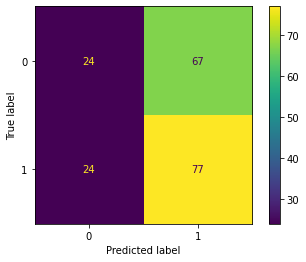

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(LogReg, X_test, y_test)

## K Nearest Neighbors

In [47]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

C:\Users\User1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Find Best Value of K

In [54]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.59375, 0.5572916666666666, 0.5, 0.53125, 0.5572916666666666, 0.5572916666666666, 0.5729166666666666, 0.5572916666666666, 0.53125, 0.5625, 0.5260416666666666, 0.5520833333333334, 0.5208333333333334, 0.5625, 0.5208333333333334, 0.5052083333333334, 0.5260416666666666, 0.5052083333333334, 0.5052083333333334, 0.484375, 0.5208333333333334, 0.5104166666666666, 0.5, 0.5364583333333334, 0.5104166666666666]


Text(0, 0.5, 'Testing Accuracy')

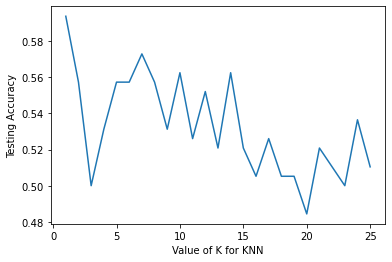

In [55]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [57]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.59375


C:\Users\User1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
